In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
#Read csv files
comm=pd.read_csv(r"C:\Users\Abhis\OneDrive\Desktop\instagram_data\comments.csv")
foll=pd.read_csv(r"C:\Users\Abhis\OneDrive\Desktop\instagram_data\follows.csv") 
like=pd.read_csv(r"C:\Users\Abhis\OneDrive\Desktop\instagram_data\likes.csv") 
photo=pd.read_csv(r"C:\Users\Abhis\OneDrive\Desktop\instagram_data\photos.csv") 
tag=pd.read_csv(r"C:\Users\Abhis\OneDrive\Desktop\instagram_data\tags.csv") 
user=pd.read_csv(r"C:\Users\Abhis\OneDrive\Desktop\instagram_data\users.csv") 

In [3]:
comm.head()

,id,comment,User id,Photo id,created Timestamp,posted date,emoji used,Hashtags used count
0,1,unde at dolorem,2,1,13-04-2023 08:04,April 14,yes,1
1,2,quae ea ducimus,3,1,13-04-2023 08:04,April 14,no,2
2,3,alias a voluptatum,5,1,13-04-2023 08:04,April 14,no,4
3,4,facere suscipit sunt,14,1,13-04-2023 08:04,April 14,yes,2
4,5,totam eligendi quaerat,17,1,13-04-2023 08:04,April 14,yes,1


In [4]:
foll.head()

,follower,followee,created time,is follower active,followee Acc status
0,2,1,13-04-2023 08:04,1,Private
1,2,3,13-04-2023 08:04,0,private
2,2,4,13-04-2023 08:04,0,public
3,2,5,13-04-2023 08:04,0,private
4,2,6,13-04-2023 08:04,1,private


In [5]:
like.head()

,user,photo,created time,following or not,like type
0,2,1,13-04-2023 08:04,yes,heart emoji
1,2,4,13-04-2023 08:04,no,thumbs up
2,2,8,13-04-2023 08:04,yes,laughing
3,2,9,13-04-2023 08:04,no,fire
4,2,10,13-04-2023 08:04,yes,clap


In [7]:
photo.head()

,id,image link,user ID,created dat,Insta filter used,photo type
0,1,http://elijah.biz,1,13-04-2023 08:04,yes,photo
1,2,https://shanon.org,1,13-04-2023 08:04,no,photo
2,3,http://vicky.biz,1,13-04-2023 08:04,no,photo
3,4,http://oleta.net,1,13-04-2023 08:04,no,photo
4,5,https://jennings.biz,1,13-04-2023 08:04,yes,photo


In [8]:
tag.head()

,id,tag text,created time,location
0,1,sunset,13-04-2023 08:04,florida
1,2,photography,13-04-2023 08:04,washington DC
2,3,sunrise,13-04-2023 08:04,new york
3,4,landscape,13-04-2023 08:04,london
4,5,food,13-04-2023 08:04,brazil


In [9]:
user.head()

,id,name,created time,private/public,post count,Verified status
0,1,Kenton_Kirlin,16-02-2017 18:22,yes,11,no
1,2,Andre_Purdy85,02-04-2017 17:11,no,7,no
2,3,Harley_Lind18,21-02-2017 11:12,no,2,no
3,4,Arely_Bogan63,13-08-2016 01:28,yes,1,no
4,5,Aniya_Hackett,07-12-2016 01:04,yes,3,no


In [10]:
#Drop unnecesarry columns
comm=comm.drop(['created Timestamp','posted date'],axis=1)
like=like.drop(['created time','following or not'],axis=1)
photo=photo.drop(['image link','created dat'],axis=1)
user=user.drop(['name','private/public'],axis=1)

In [11]:
#Merge csv files
df=tag.merge(foll,on='created time',how='left')

In [12]:
df=df.merge(comm,on='id',how='left')
df.head()

,id,tag text,created time,location,follower,followee,is follower active,followee Acc status,comment,User id,Photo id,emoji used,Hashtags used count
0,1,sunset,13-04-2023 08:04,florida,2,1,1,Private,unde at dolorem,2,1,yes,1
1,1,sunset,13-04-2023 08:04,florida,2,3,0,private,unde at dolorem,2,1,yes,1
2,1,sunset,13-04-2023 08:04,florida,2,4,0,public,unde at dolorem,2,1,yes,1
3,1,sunset,13-04-2023 08:04,florida,2,5,0,private,unde at dolorem,2,1,yes,1
4,1,sunset,13-04-2023 08:04,florida,2,6,1,private,unde at dolorem,2,1,yes,1


In [13]:
df.rename(columns={'User  id':'user id'},inplace=True)

In [14]:
like.rename(columns={'user ':'user id','photo':'photo id'},inplace=True)

In [15]:
df=df.merge(like,on='user id',how='left')
df.head()

,id,tag text,created time,location,follower,followee,is follower active,followee Acc status,comment,user id,Photo id,emoji used,Hashtags used count,photo id,like type
0,1,sunset,13-04-2023 08:04,florida,2,1,1,Private,unde at dolorem,2,1,yes,1,1,heart emoji
1,1,sunset,13-04-2023 08:04,florida,2,1,1,Private,unde at dolorem,2,1,yes,1,4,thumbs up
2,1,sunset,13-04-2023 08:04,florida,2,1,1,Private,unde at dolorem,2,1,yes,1,8,laughing
3,1,sunset,13-04-2023 08:04,florida,2,1,1,Private,unde at dolorem,2,1,yes,1,9,fire
4,1,sunset,13-04-2023 08:04,florida,2,1,1,Private,unde at dolorem,2,1,yes,1,10,clap


In [16]:
df=df.merge(photo,on='id',how='left')

In [17]:
df=df.merge(user,on='id',how='left')
df.head()

,id,tag text,created time_x,location,follower,followee,is follower active,followee Acc status,comment,user id,...,emoji used,Hashtags used count,photo id,like type,user ID,Insta filter used,photo type,created time_y,post count,Verified status
0,1,sunset,13-04-2023 08:04,florida,2,1,1,Private,unde at dolorem,2,...,yes,1,1,heart emoji,1,yes,photo,16-02-2017 18:22,11,no
1,1,sunset,13-04-2023 08:04,florida,2,1,1,Private,unde at dolorem,2,...,yes,1,4,thumbs up,1,yes,photo,16-02-2017 18:22,11,no
2,1,sunset,13-04-2023 08:04,florida,2,1,1,Private,unde at dolorem,2,...,yes,1,8,laughing,1,yes,photo,16-02-2017 18:22,11,no
3,1,sunset,13-04-2023 08:04,florida,2,1,1,Private,unde at dolorem,2,...,yes,1,9,fire,1,yes,photo,16-02-2017 18:22,11,no
4,1,sunset,13-04-2023 08:04,florida,2,1,1,Private,unde at dolorem,2,...,yes,1,10,clap,1,yes,photo,16-02-2017 18:22,11,no


In [18]:
df.shape

(29287566, 21)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29287566 entries, 0 to 29287565
Data columns (total 21 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   id                   int64 
 1   tag text             object
 2   created time_x       object
 3   location             object
 4   follower             int64 
 5   followee             int64 
 6   is follower active   int64 
 7   followee Acc status  object
 8   comment              object
 9   user id              int64 
 10  Photo id             int64 
 11  emoji used           object
 12  Hashtags used count  int64 
 13  photo id             int64 
 14  like type            object
 15  user ID              int64 
 16  Insta filter used    object
 17  photo type           object
 18  created time_y       object
 19  post count           int64 
 20  Verified status      object
dtypes: int64(10), object(11)
memory usage: 4.6+ GB


In [20]:
df['follower'].value_counts()

follower
2      380358
3      380358
4      380358
5      380358
6      380358
        ...  
96     380358
97     380358
98     380358
99     380358
100    380358
Name: count, Length: 77, dtype: int64

In [21]:
df['Photo id'].value_counts()

Photo id
1    29287566
Name: count, dtype: int64

In [22]:
df['user ID'].value_counts()

user ID
6    8484399
2    6548157
1    5831595
3    5160771
4    3262644
Name: count, dtype: int64

In [23]:
#dropping columns
df=df.drop(['created time_x','follower','followee ','Photo id','user ID'],axis=1)

In [24]:
df.isnull().sum()

id                     0
tag text               0
location               0
is follower active     0
followee Acc status    0
comment                0
user id                0
emoji used             0
Hashtags used count    0
photo id               0
like type              0
Insta filter used      0
photo type             0
created time_y         0
post count             0
Verified status        0
dtype: int64

In [25]:
#Handling followee Acc status column
df['followee Acc status'].value_counts()

followee Acc status
public     11733468
private    11714258
Private     5839840
Name: count, dtype: int64

In [26]:
df['followee Acc status']=df['followee Acc status'].str.lower()
df['followee Acc status'].value_counts()

followee Acc status
private    17554098
public     11733468
Name: count, dtype: int64

In [27]:
df['Hashtags used count'].unique()

array([1, 2, 4, 0, 5, 6, 3])

In [28]:
df['photo type'].unique()

array(['photo', 'video'], dtype=object)

<Axes: title={'center': 'posts per hour'}, xlabel='post_hour'>

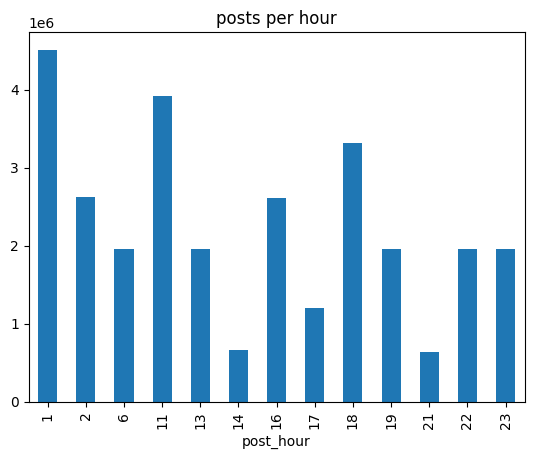

In [29]:
#visualizing no. of posts per hour 
df['created time']=pd.to_datetime(df['created time_y'],dayfirst=True,errors='coerce')
df['post_hour']=df['created time'].dt.hour
df['post_hour'].value_counts().sort_index().plot(kind = 'bar',title='posts per hour')

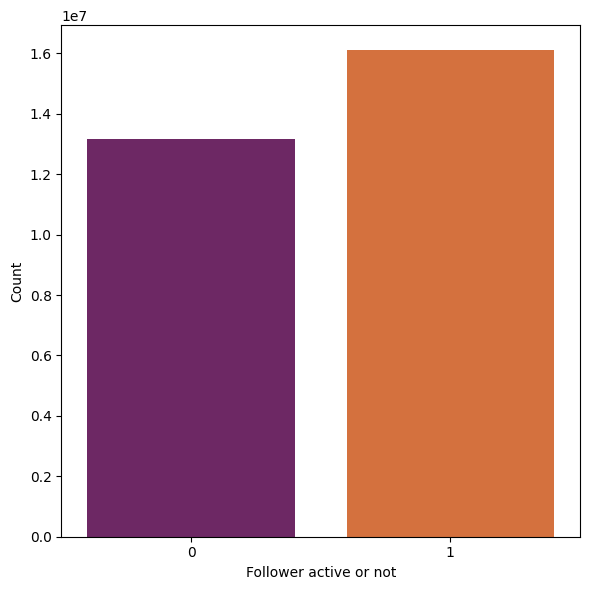

In [30]:
#Visualizing is follower active or not
plt.figure(figsize = (6,6))
ax = sns.countplot(data=df, x='is follower active',hue='is follower active',palette='inferno',legend=False)
plt.xlabel('Follower active or not')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

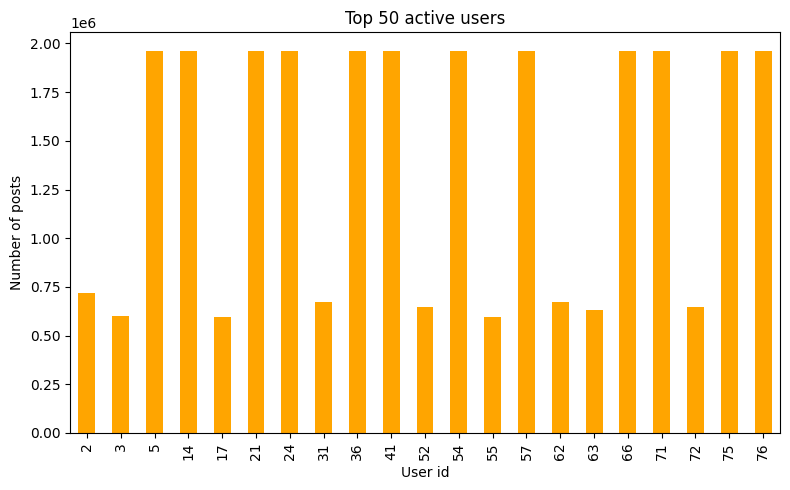

In [31]:
#visualizing top active users
top_users=df['user id'].value_counts().sort_index()
plt.figure(figsize=(8,5))
top_users.plot(kind='bar',color='orange')
plt.title('Top 50 active users')
plt.xlabel("User id")
plt.ylabel("Number of posts")
plt.tight_layout()

Text(0, 0.5, 'Count')

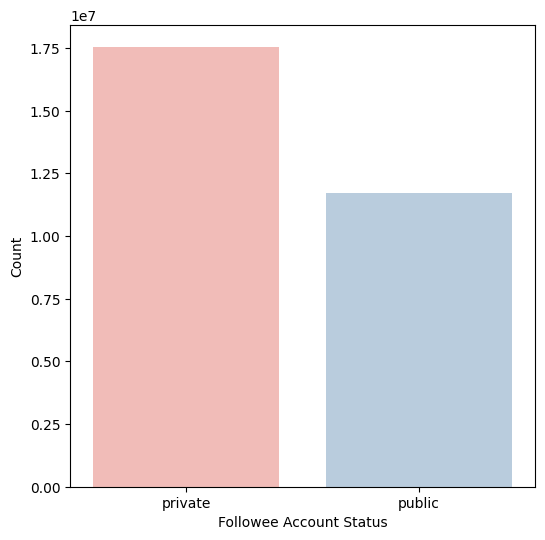

In [32]:
#Visualising followee account status
plt.figure(figsize = (6,6))
ax = sns.countplot(data=df, x='followee Acc status',hue='followee Acc status',palette='Pastel1',legend=False)
plt.xlabel('Followee Account Status')
plt.ylabel('Count')

<Axes: title={'center': 'Hashtags Usage Distribution'}, ylabel='Frequency'>

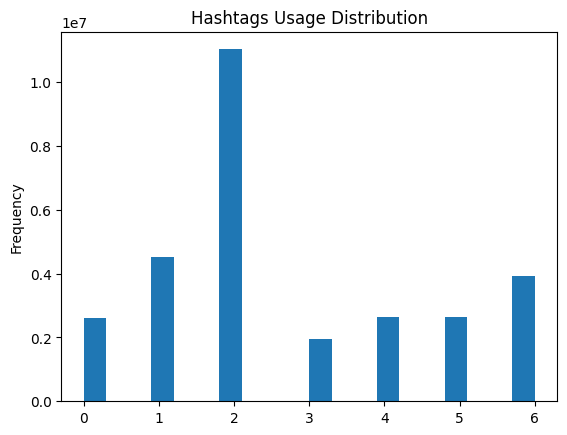

In [33]:
#Count plot of Numbers of hashtags used
df['Hashtags used count'].plot(kind='hist',bins=20,title='Hashtags Usage Distribution')

Text(0, 0.5, 'Count')

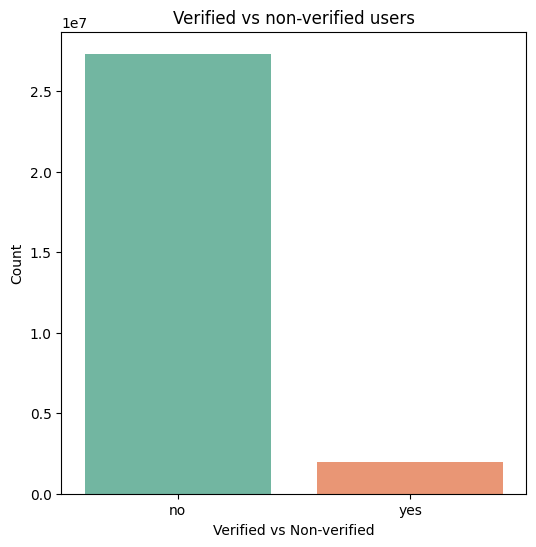

In [34]:
#count verified vs non-verified user
plt.figure(figsize = (6,6))
ax = sns.countplot(data=df, x='Verified status',hue='Verified status',palette='Set2',legend=False)
plt.title('Verified vs non-verified users')
plt.xlabel('Verified vs Non-verified')
plt.ylabel('Count')

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'london'),
  Text(1, 0, 'florida'),
  Text(2, 0, 'washington DC'),
  Text(3, 0, 'japan'),
  Text(4, 0, 'new york'),
  Text(5, 0, 'Mumbai'),
  Text(6, 0, 'australia'),
  Text(7, 0, 'bangalore'),
  Text(8, 0, 'brazil')])

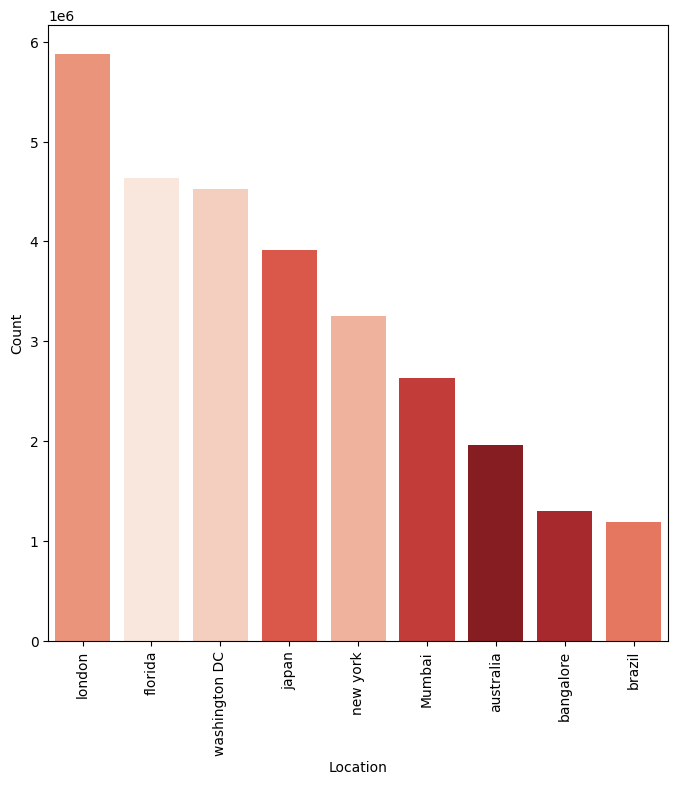

In [35]:
#Count plot of varios locations
plt.figure(figsize = (8,8))
ax = sns.countplot(data=df, x='location',hue='location',order=df['location'].value_counts().index ,palette='Reds',legend=False)
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)

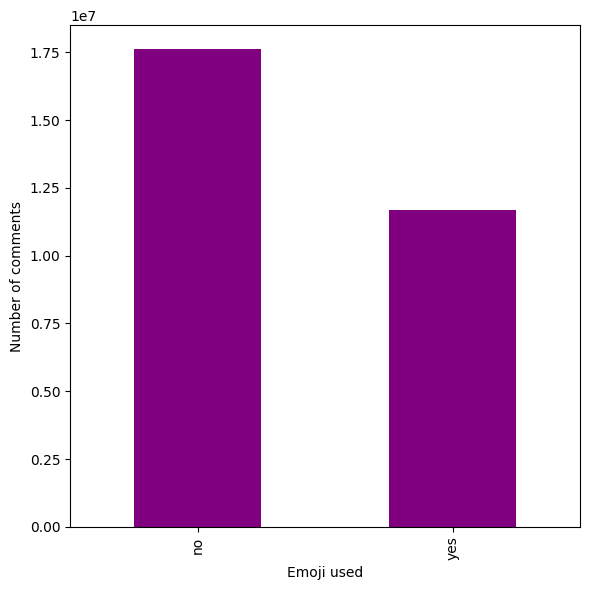

In [36]:
#visulazing emoji usage vs number of comments
emoji_group=df.groupby('emoji used')['comment'].count()
plt.figure(figsize=(6,6))
emoji_group.plot(kind='bar',color='purple')
plt.xlabel('Emoji used')
plt.ylabel('Number of comments')
plt.tight_layout()
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

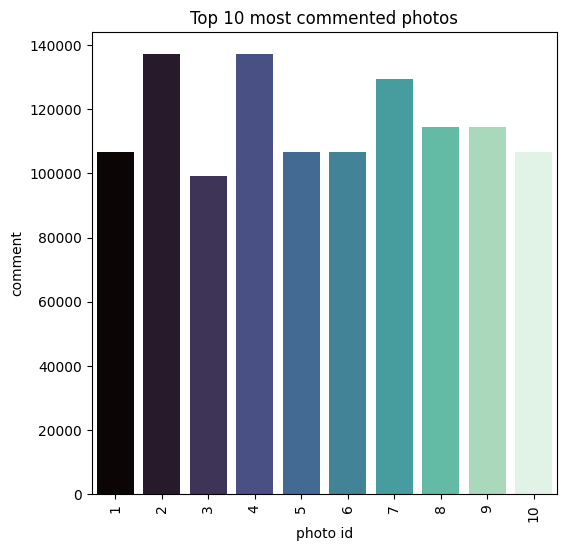

In [40]:
#Visualzing top 10 most commenntd photos
df1 = df[['photo id','comment']]
df2 = df1.groupby(['photo id'])['comment'].count().head(10)
df2 = df2.to_frame()
plt.figure(figsize = (6,6))
sns.barplot(data=df2,x='photo id' ,y='comment',hue='photo id',palette='mako',legend=False)
plt.title('Top 10 most commented photos')
plt.xticks(rotation=90)

([0, 1], [Text(0, 0, 'no'), Text(1, 0, 'yes')])

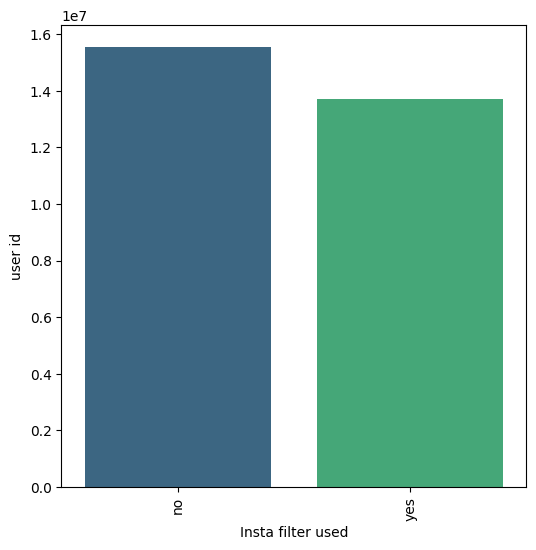

In [38]:
#Count plot of Insta filter used
df3 = df[['Insta filter used','user id']]
df4 = df3.groupby(['Insta filter used'])['user id'].count().head(10)
df4 = df4.to_frame()
plt.figure(figsize = (6,6))
sns.barplot(data=df4,x='Insta filter used' ,y='user id',hue='Insta filter used',palette='viridis',legend=False)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'heart emoji'),
  Text(1, 0, 'thumbs up'),
  Text(2, 0, 'laughing'),
  Text(3, 0, 'fire'),
  Text(4, 0, 'clap'),
  Text(5, 0, 'single tap'),
  Text(6, 0, 'double tap')])

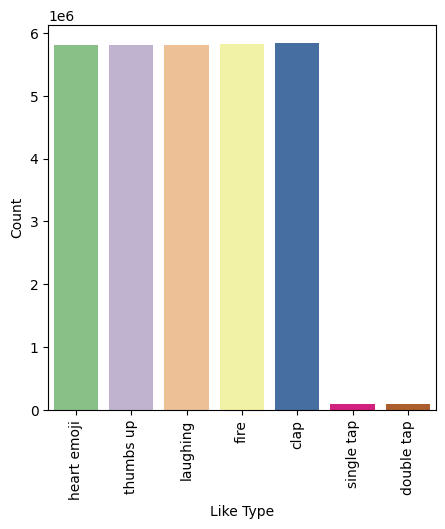

In [39]:
#Count plot of varios like types
plt.figure(figsize = (5,5))
ax = sns.countplot(data=df, x='like type',hue='like type' ,palette='Accent',legend=False)
plt.xlabel('Like Type')
plt.ylabel('Count')
plt.xticks(rotation=90)

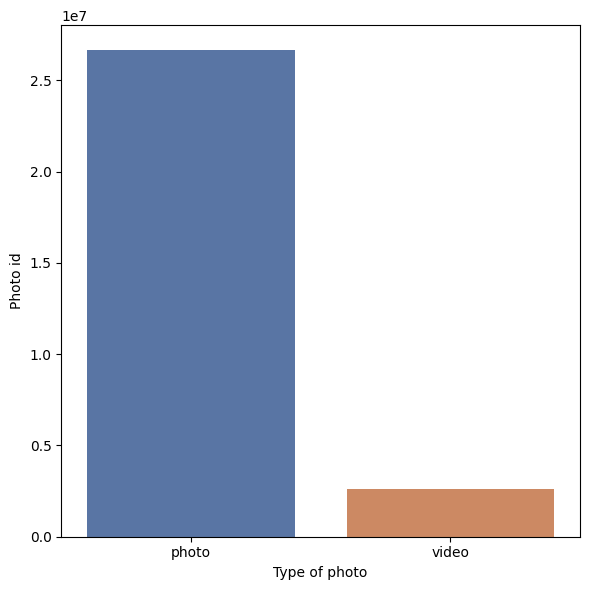

In [41]:
#Visualizing Types of posts 
grouped_data=df.groupby(['photo type'])['photo id'].count()
grouped_data=grouped_data.to_frame()
plt.figure(figsize = (6,6))
sns.barplot(x = 'photo type', y = 'photo id', hue = 'photo type',data = grouped_data, palette='deep',legend = False)
plt.xlabel('Type of photo')
plt.ylabel('Photo id')
plt.tight_layout()
plt.show()

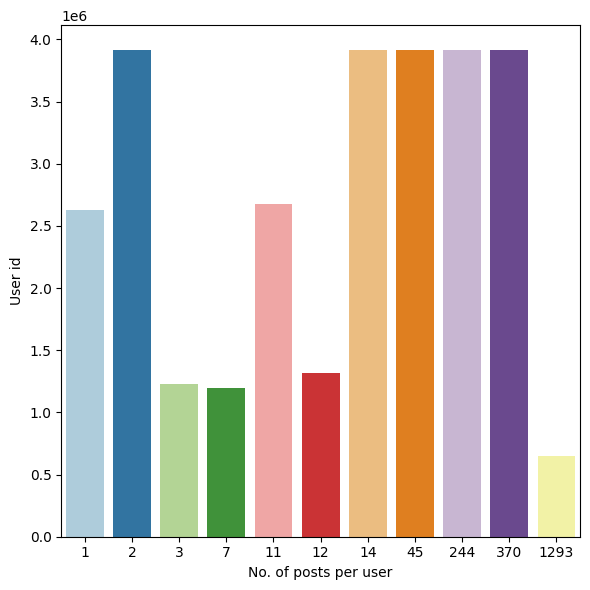

In [42]:
#Visualizing no. of posts per user
grouped=df.groupby(['post count'])['user id'].count()
grouped=grouped.to_frame()
plt.figure(figsize = (6,6))
sns.barplot(x = 'post count', y = 'user id', hue = 'post count',data = grouped, palette='Paired',legend = False)
plt.xlabel('No. of posts per user')
plt.ylabel('User id')
plt.tight_layout()
plt.show()